In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
import string


In [2]:
customer_service_enquiry = pd.read_csv('Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv')

In [3]:
customer_service_enquiry 

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...
...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance..."
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...


In [4]:
customer_service_enquiry .dtypes

flags          object
instruction    object
category       object
intent         object
response       object
dtype: object

In [5]:
customer_service_enquiry .shape

(26872, 5)

In [6]:
customer_service_enquiry 

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...
...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance..."
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ORDER'),
  Text(1, 0, 'SHIPPING'),
  Text(2, 0, 'CANCEL'),
  Text(3, 0, 'INVOICE'),
  Text(4, 0, 'PAYMENT'),
  Text(5, 0, 'REFUND'),
  Text(6, 0, 'FEEDBACK'),
  Text(7, 0, 'CONTACT'),
  Text(8, 0, 'ACCOUNT'),
  Text(9, 0, 'DELIVERY'),
  Text(10, 0, 'SUBSCRIPTION')])

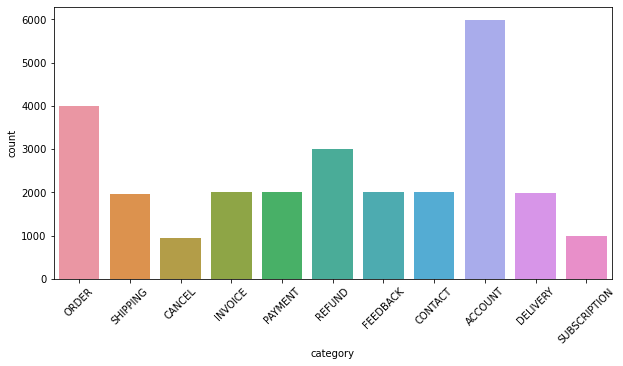

In [7]:
plt.figure(figsize = (10,5))
sn.countplot(customer_service_enquiry['category'])
plt.xticks(rotation = 45)

In [8]:
## its been notfied that , most of the quires were about account and order status related . my goal is to predict the category based on the comments 

In [9]:
print(customer_service_enquiry .iloc[1000,1])
print(customer_service_enquiry .iloc[5000,1])
print(customer_service_enquiry .iloc[7000,1])
print(customer_service_enquiry .iloc[10000,1])
print(customer_service_enquiry .iloc[11000,1])
print(customer_service_enquiry .iloc[15000,1])
print(customer_service_enquiry .iloc[17000,1])
print(customer_service_enquiry .iloc[19000,1])
print(customer_service_enquiry .iloc[20000,1])

want help adding an item to order {{Order Number}}
see what payment optionsx are allowed
I'm dissatisfied with ur work help me making a complaint
open a {{Account Type}} account
deleting {{Account Category}} account
assistance downloading my invoice from {{Person Name}}
where can I sign up to the corporate newsletter?
shop several articles
assistance to recover the key of my user profile


In [10]:
print(customer_service_enquiry .iloc[5001,4])
print(customer_service_enquiry .iloc[1000,4])



For sure! I'm delighted to assist you in locating the available payment methods. You can find them on our website, specifically on the checkout page or the payment options section. Just navigate to the payment step during the checkout process, and you'll see a list of the payment methods we accept. If you have any trouble finding it or need further guidance, please don't hesitate to let me know. I'm here to ensure a smooth and convenient experience for you.
Thank you for getting in touch to us for assistance with adding an item to your order. We understand the importance of getting your order just right. To help you with this, could you please provide us with the details of the item you would like to add? By having this information, we can ensure that your order is complete and meets your expectations. We appreciate your cooperation and look forward to assisting you further.


In [11]:
# here i have taken off two words from the instruction columns 
customer_service_enquiry['instruction'].str.replace('{{Order Number}}', '') 


C:\Users\User\AppData\Local\Temp\ipykernel_20968\3644450732.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_service_enquiry['instruction'].str.replace('{{Order Number}}', '')


0                         question about cancelling order 
1               i have a question about cancelling oorder 
2                          i need help cancelling puchase 
3                               I need to cancel purchase 
4             I cannot afford this order, cancel purchase 
                               ...                        
26867    I am waiting for a rebate of {{Refund Amount}}...
26868    how to see if there is anything wrong with my ...
26869    I'm waiting for a reimbjrsement of {{Currency ...
26870    I don't know what to do to see my reimbursemen...
26871    I need to know if there is anything new on the...
Name: instruction, Length: 26872, dtype: object

In [12]:
def cleaned (text):
    ## Remove substrings
    cleaned_text = re.sub(r'\{\{.*?&$£%\}\}', '', text)
    cleaned_text = cleaned_text.lower()
    #Remove URLs
    cleaned_text= re.sub(r'http\S+', '',  cleaned_text)
    #Remove number
    cleaned_text = re.sub(r'\d+', '',  cleaned_text)
    #Remove extra white space
    cleaned_text= re.sub(r'\s+', ' ',  cleaned_text).strip()
    # Remove non-alphanumeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '',  cleaned_text)
    # remove punctuation
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    ##removing stopwords
    stop_words = set(stopwords.words('english'))
    tokenization =  cleaned_text.split()
    tokenization = [word for word in tokenization if word not in stop_words]
    cleaned_text = ' '.join(tokenization)
    # Stemming
    stemmer = PorterStemmer()
    cleaned_text_tokens = cleaned_text.split()
    cleaned_text_tokens = [stemmer.stem(word) for word in cleaned_text_tokens]
    cleaned_text = ' '.join(cleaned_text_tokens)
    return cleaned_text
    
    
        

In [13]:
customer_service_enquiry

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...
...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance..."
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...


In [14]:
customer_service_enquiry['cleaned_instruction'] = customer_service_enquiry['instruction'].apply(cleaned)

In [15]:
customer_service_enquiry.iloc[0,1]

'question about cancelling order {{Order Number}}'

In [16]:
customer_service_enquiry.iloc[0,5]

'question cancel order order number'

In [17]:
customer_service_enquiry['cleaned_response'] = customer_service_enquiry['response'].apply(cleaned)

In [18]:
customer_service_enquiry.iloc[1000,4]

'Thank you for getting in touch to us for assistance with adding an item to your order. We understand the importance of getting your order just right. To help you with this, could you please provide us with the details of the item you would like to add? By having this information, we can ensure that your order is complete and meets your expectations. We appreciate your cooperation and look forward to assisting you further.'

In [19]:
customer_service_enquiry.iloc[1000,6]

'thank get touch us assist ad item order understand import get order right help could pleas provid us detail item would like add inform ensur order complet meet expect appreci cooper look forward assist'

In [20]:
customer_service_enquiry

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancel order order number,ive understood question regard cancel order or...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancel oorder order number,ive inform question cancel order order number ...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancel puchas order number,sens your seek assist cancel purchas purchas n...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchas order number,understood need assist cancel purchas order nu...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchas order number,im sensit fact your face financi difficulti ne...
...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,wait rebat refund amount dollar,thank share situat regard pend rebat currenc s...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anyth wrong restitut,ensur accuraci restitut utmost import us appre...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im wait reimbjrsement currenc symbolrefund amount,firstli genuin understand import expect reimbu...
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimburs statu,ive understood your unsur check statu reimburs...


In [21]:
from numpy import asarray

from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'category' column
customer_service_enquiry['category_encoded'] = encoder.fit_transform(customer_service_enquiry[['category']])

# Display the encoded categories
print(customer_service_enquiry[['category', 'category_encoded']])

      category  category_encoded
0        ORDER               6.0
1        ORDER               6.0
2        ORDER               6.0
3        ORDER               6.0
4        ORDER               6.0
...        ...               ...
26867   REFUND               8.0
26868   REFUND               8.0
26869   REFUND               8.0
26870   REFUND               8.0
26871   REFUND               8.0

[26872 rows x 2 columns]


In [22]:
customer_service_enquiry

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response,category_encoded
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancel order order number,ive understood question regard cancel order or...,6.0
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancel oorder order number,ive inform question cancel order order number ...,6.0
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancel puchas order number,sens your seek assist cancel purchas purchas n...,6.0
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchas order number,understood need assist cancel purchas order nu...,6.0
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchas order number,im sensit fact your face financi difficulti ne...,6.0
...,...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,wait rebat refund amount dollar,thank share situat regard pend rebat currenc s...,8.0
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anyth wrong restitut,ensur accuraci restitut utmost import us appre...,8.0
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im wait reimbjrsement currenc symbolrefund amount,firstli genuin understand import expect reimbu...,8.0
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimburs statu,ive understood your unsur check statu reimburs...,8.0


In [23]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tokenization
customer_service_enquiry['tokenized_instruction'] = customer_service_enquiry['cleaned_instruction'].apply(word_tokenize)
customer_service_enquiry['tokenized_response'] = customer_service_enquiry['cleaned_response'].apply(word_tokenize)

# Lemmatization
lemmatizer = WordNetLemmatizer()
customer_service_enquiry['lemmatized_instruction'] = customer_service_enquiry['tokenized_instruction'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
customer_service_enquiry['lemmatized_response'] = customer_service_enquiry['tokenized_response'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_instruction = vectorizer.fit_transform(customer_service_enquiry['lemmatized_instruction'].apply(lambda x: ' '.join(x)))
X_response = vectorizer.transform(customer_service_enquiry['lemmatized_response'].apply(lambda x: ' '.join(x)))

# Normalization
scaler = StandardScaler()
X_instruction_normalized = scaler.fit_transform(X_instruction.toarray())
X_response_normalized = scaler.transform(X_response.toarray())

In [25]:
customer_service_enquiry

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response,category_encoded,tokenized_instruction,tokenized_response,lemmatized_instruction,lemmatized_response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancel order order number,ive understood question regard cancel order or...,6.0,"[question, cancel, order, order, number]","[ive, understood, question, regard, cancel, or...","[question, cancel, order, order, number]","[ive, understood, question, regard, cancel, or..."
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancel oorder order number,ive inform question cancel order order number ...,6.0,"[question, cancel, oorder, order, number]","[ive, inform, question, cancel, order, order, ...","[question, cancel, oorder, order, number]","[ive, inform, question, cancel, order, order, ..."
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancel puchas order number,sens your seek assist cancel purchas purchas n...,6.0,"[need, help, cancel, puchas, order, number]","[sens, your, seek, assist, cancel, purchas, pu...","[need, help, cancel, puchas, order, number]","[sen, your, seek, assist, cancel, purchas, pur..."
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchas order number,understood need assist cancel purchas order nu...,6.0,"[need, cancel, purchas, order, number]","[understood, need, assist, cancel, purchas, or...","[need, cancel, purchas, order, number]","[understood, need, assist, cancel, purchas, or..."
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchas order number,im sensit fact your face financi difficulti ne...,6.0,"[can, not, afford, order, cancel, purchas, ord...","[im, sensit, fact, your, face, financi, diffic...","[can, not, afford, order, cancel, purchas, ord...","[im, sensit, fact, your, face, financi, diffic..."
...,...,...,...,...,...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,wait rebat refund amount dollar,thank share situat regard pend rebat currenc s...,8.0,"[wait, rebat, refund, amount, dollar]","[thank, share, situat, regard, pend, rebat, cu...","[wait, rebat, refund, amount, dollar]","[thank, share, situat, regard, pend, rebat, cu..."
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anyth wrong restitut,ensur accuraci restitut utmost import us appre...,8.0,"[see, anyth, wrong, restitut]","[ensur, accuraci, restitut, utmost, import, us...","[see, anyth, wrong, restitut]","[ensur, accuraci, restitut, utmost, import, u,..."
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im wait reimbjrsement currenc symbolrefund amount,firstli genuin understand import expect reimbu...,8.0,"[im, wait, reimbjrsement, currenc, symbolrefun...","[firstli, genuin, understand, import, expect, ...","[im, wait, reimbjrsement, currenc, symbolrefun...","[firstli, genuin, understand, import, expect, ..."
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimburs statu,ive understood your unsur check statu reimburs...,8.0,"[dont, know, see, reimburs, statu]","[ive, understood, your, unsur, check, statu, r...","[dont, know, see, reimburs, statu]","[ive, understood, your, unsur, check, statu, r..."


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(customer_service_enquiry['lemmatized_instruction'], customer_service_enquiry['category_encoded'], test_size=0.2, random_state=42)

# Convert tokenized words into strings
X_train_str = [' '.join(tokens) for tokens in X_train]
X_test_str = [' '.join(tokens) for tokens in X_test]

# Adjust vocabulary size and add n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)  # Example values, adjust as needed
X_train_vectorized = vectorizer.fit_transform(X_train_str)
X_test_vectorized = vectorizer.transform(X_test_str)

# Perform feature selection based on model performance or feature importance
selector = SelectKBest(score_func=chi2, k=1000)  # Example value, adjust as needed
X_train_selected = selector.fit_transform(X_train_vectorized, y_train)
X_test_selected = selector.transform(X_test_vectorized)

# Normalization
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_selected.toarray())
X_test_normalized = scaler.transform(X_test_selected.toarray())

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_normalized, y_train)

# Predict on the testing data
y_pred = model.predict(X_test_normalized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9979534883720931


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(customer_service_enquiry['lemmatized_response'], customer_service_enquiry['category_encoded'], test_size=0.2, random_state=42)

# Convert tokenized words into strings
X_train_str = [' '.join(tokens) for tokens in X_train]
X_test_str = [' '.join(tokens) for tokens in X_test]

# Adjust vocabulary size and add n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)  # Example values, adjust as needed
X_train_vectorized = vectorizer.fit_transform(X_train_str)
X_test_vectorized = vectorizer.transform(X_test_str)

# Perform feature selection based on model performance or feature importance
selector = SelectKBest(score_func=chi2, k=1000)  # Example value, adjust as needed
X_train_selected = selector.fit_transform(X_train_vectorized, y_train)
X_test_selected = selector.transform(X_test_vectorized)

# Normalization
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_selected.toarray())
X_test_normalized = scaler.transform(X_test_selected.toarray())

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_normalized, y_train)

# Predict on the testing data
y_pred = model.predict(X_test_normalized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9985116279069768


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
##feed back analsis
customer_service_enquiry

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response,category_encoded,tokenized_instruction,tokenized_response,lemmatized_instruction,lemmatized_response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...,question cancel order order number,ive understood question regard cancel order or...,6.0,"[question, cancel, order, order, number]","[ive, understood, question, regard, cancel, or...","[question, cancel, order, order, number]","[ive, understood, question, regard, cancel, or..."
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...,question cancel oorder order number,ive inform question cancel order order number ...,6.0,"[question, cancel, oorder, order, number]","[ive, inform, question, cancel, order, order, ...","[question, cancel, oorder, order, number]","[ive, inform, question, cancel, order, order, ..."
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...,need help cancel puchas order number,sens your seek assist cancel purchas purchas n...,6.0,"[need, help, cancel, puchas, order, number]","[sens, your, seek, assist, cancel, purchas, pu...","[need, help, cancel, puchas, order, number]","[sen, your, seek, assist, cancel, purchas, pur..."
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...,need cancel purchas order number,understood need assist cancel purchas order nu...,6.0,"[need, cancel, purchas, order, number]","[understood, need, assist, cancel, purchas, or...","[need, cancel, purchas, order, number]","[understood, need, assist, cancel, purchas, or..."
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...,cannot afford order cancel purchas order number,im sensit fact your face financi difficulti ne...,6.0,"[can, not, afford, order, cancel, purchas, ord...","[im, sensit, fact, your, face, financi, diffic...","[can, not, afford, order, cancel, purchas, ord...","[im, sensit, fact, your, face, financi, diffic..."
...,...,...,...,...,...,...,...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...,wait rebat refund amount dollar,thank share situat regard pend rebat currenc s...,8.0,"[wait, rebat, refund, amount, dollar]","[thank, share, situat, regard, pend, rebat, cu...","[wait, rebat, refund, amount, dollar]","[thank, share, situat, regard, pend, rebat, cu..."
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...,see anyth wrong restitut,ensur accuraci restitut utmost import us appre...,8.0,"[see, anyth, wrong, restitut]","[ensur, accuraci, restitut, utmost, import, us...","[see, anyth, wrong, restitut]","[ensur, accuraci, restitut, utmost, import, u,..."
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance...",im wait reimbjrsement currenc symbolrefund amount,firstli genuin understand import expect reimbu...,8.0,"[im, wait, reimbjrsement, currenc, symbolrefun...","[firstli, genuin, understand, import, expect, ...","[im, wait, reimbjrsement, currenc, symbolrefun...","[firstli, genuin, understand, import, expect, ..."
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...,dont know see reimburs statu,ive understood your unsur check statu reimburs...,8.0,"[dont, know, see, reimburs, statu]","[ive, understood, your, unsur, check, statu, r...","[dont, know, see, reimburs, statu]","[ive, understood, your, unsur, check, statu, r..."


In [31]:
customer_service_enquiry['category'].unique()

array(['ORDER', 'SHIPPING', 'CANCEL', 'INVOICE', 'PAYMENT', 'REFUND',
       'FEEDBACK', 'CONTACT', 'ACCOUNT', 'DELIVERY', 'SUBSCRIPTION'],
      dtype=object)

In [32]:
customer_service_enquiry['intent'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

In [33]:
satiosfaction_analysis =customer_service_enquiry[customer_service_enquiry['category'] == 'FEEDBACK']

In [34]:
satiosfaction_analysis 

,flags,instruction,category,intent,response,cleaned_instruction,cleaned_response,category_encoded,tokenized_instruction,tokenized_response,lemmatized_instruction,lemmatized_response
6914,BL,help me to file a claim,FEEDBACK,complaint,I've realized you need assistance in filing a ...,help file claim,ive realiz need assist file claim file claim v...,4.0,"[help, file, claim]","[ive, realiz, need, assist, file, claim, file,...","[help, file, claim]","[ive, realiz, need, assist, file, claim, file,..."
6915,BILQ,where can i make a consumer claim against ur o...,FEEDBACK,complaint,I sincerely apologize for any issues you've en...,make consum claim ur organ,sincer apolog issu youv encount appreci reach ...,4.0,"[make, consum, claim, ur, organ]","[sincer, apolog, issu, youv, encount, appreci,...","[make, consum, claim, ur, organ]","[sincer, apolog, issu, youv, encount, appreci,..."
6916,BLQ,want help to make a consumer complaint against...,FEEDBACK,complaint,I'm sorry to hear that you're dissatisfied and...,want help make consum complaint ur compani,im sorri hear your dissatisfi would like assis...,4.0,"[want, help, make, consum, complaint, ur, comp...","[im, sorri, hear, your, dissatisfi, would, lik...","[want, help, make, consum, complaint, ur, comp...","[im, sorri, hear, your, dissatisfi, would, lik..."
6917,BCEQ,I'm not happy with ur service need help to fil...,FEEDBACK,complaint,I apologize for any dissatisfaction you may ha...,im happi ur servic need help file complaint,apolog dissatisfact may experienc servic feedb...,4.0,"[im, happi, ur, servic, need, help, file, comp...","[apolog, dissatisfact, may, experienc, servic,...","[im, happi, ur, servic, need, help, file, comp...","[apolog, dissatisfact, may, experienc, servic,..."
6918,BL,help to make a complaint,FEEDBACK,complaint,I'm sorry to hear that you're looking to make ...,help make complaint,im sorri hear your look make complaint busi fe...,4.0,"[help, make, complaint]","[im, sorri, hear, your, look, make, complaint,...","[help, make, complaint]","[im, sorri, hear, your, look, make, complaint,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
22877,BCLP,I would like to leave a comment for your compa...,FEEDBACK,review,Thank you for expressing your desire to provid...,would like leav comment compani help,thank express desir provid comment compani fee...,4.0,"[would, like, leav, comment, compani, help]","[thank, express, desir, provid, comment, compa...","[would, like, leav, comment, compani, help]","[thank, express, desir, provid, comment, compa..."
22878,BIL,where to send feedback about a product?,FEEDBACK,review,Thank you for your interest in providing feedb...,send feedback product,thank interest provid feedback product appreci...,4.0,"[send, feedback, product]","[thank, interest, provid, feedback, product, a...","[send, feedback, product]","[thank, interest, provid, feedback, product, a..."
22879,BL,help me submitting my feedback about your company,FEEDBACK,review,Of course! I'm here to guide you through the p...,help submit feedback compani,cours im guid process submit valuabl feedback ...,4.0,"[help, submit, feedback, compani]","[cours, im, guid, process, submit, valuabl, fe...","[help, submit, feedback, compani]","[cours, im, guid, process, submit, valuabl, fe..."
22880,BILP,could you help me leave feedback about a product?,FEEDBACK,review,Assuredly! We are here to guide you through th...,could help leav feedback product,assuredli guid process leav feedback product o...,4.0,"[could, help, leav, feedback, product]","[assuredli, guid, process, leav, feedback, pro...","[could, help, leav, feedback, product]","[assuredli, guid, process, leav, feedback, pro..."


In [35]:
satiosfaction_analysis['intent'] .unique()

array(['complaint', 'review'], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='intent', ylabel='count'>

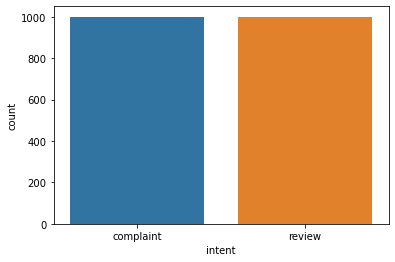

In [36]:
sn.countplot(satiosfaction_analysis['intent'])